### Combine power analysis results and analyze




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Mixed model across sites

n = 79 per site, 3 sites

In [2]:
results_sim = pd.read_csv('../processed_data/combined_powersim_results.csv', index_col=0)

full mixed model: exceeds 80% power for d =  0.25
mixed model on summary : exceeds 80% power for d =  0.25
ezANOVA: exceeds 80% power for d =  0.17500000000000002


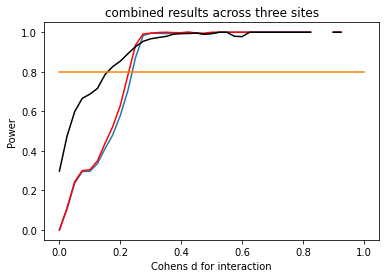

In [3]:
results_sim['psig_int'] = (results_sim['int_pval'] < .05).astype("int")
results_sim['psig_int_ez'] = (results_sim['int_pval_ez'] < .05).astype("int")
results_sim['psig_int_rm'] = (results_sim['int_pval_simple'] < .05).astype("int")

# use moving average
span = 0.025
dvals = np.arange(0, 1, span)

power_ma = pd.DataFrame()
for i, d in enumerate(dvals):
    results_d = results_sim.query('cohensd_int > %f & cohensd_int < %f' % (d - span, d + span))
    #print(d, results_d.shape)
    power_ma.loc[i, 'd'] = d
    power_ma.loc[i, 'power_randslope'] = results_d.psig_int.mean()
    power_ma.loc[i, 'power_rm'] = results_d.psig_int_rm.mean()
    power_ma.loc[i, 'power_ez'] = results_d.psig_int_ez.mean()
    power_ma.loc[i, 'n'] = results_d.psig_int.count()
    
print('full mixed model: exceeds 80% power for d = ', power_ma.query('power_randslope > 0.8').d.iloc[0])
print('mixed model on summary : exceeds 80% power for d = ', power_ma.query('power_rm > 0.8').d.iloc[0])
print('ezANOVA: exceeds 80% power for d = ', power_ma.query('power_ez > 0.8').d.iloc[0])

plt.plot(power_ma.d, power_ma.power_randslope)
plt.plot(power_ma.d, power_ma.power_rm, 'r')
plt.plot(power_ma.d, power_ma.power_ez, 'k')
plt.title('combined results across three sites')
plt.xlabel('Cohens d for interaction')
plt.ylabel('Power')
_ = plt.plot([0, 1], [0.8, 0.8])

## Single site results

n = 79

In [4]:
results_sim = pd.read_csv('../processed_data/combined_powersim_singlesite_results.csv', index_col=0)

full mixed model: exceeds 80% power for d =  0.42500000000000004
mixed model on summary : exceeds 80% power for d =  0.375
ezANOVA: exceeds 80% power for d =  0.525


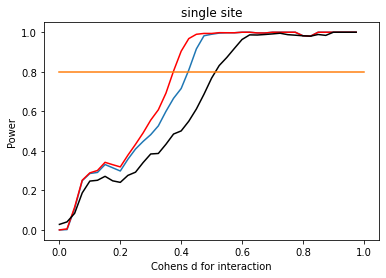

In [5]:
results_sim['psig_int'] = (results_sim['int_pval'] < .05).astype("int")
results_sim['psig_int_ez'] = (results_sim['int_pval_ez'] < .05).astype("int")
results_sim['psig_int_rm'] = (results_sim['int_pval_simple'] < .05).astype("int")

# use moving average
span = 0.025
dvals = np.arange(0, 1, span)

power_ma = pd.DataFrame()
for i, d in enumerate(dvals):
    results_d = results_sim.query('cohensd_int > %f & cohensd_int < %f' % (d - span, d + span))
    #print(d, results_d.shape)
    power_ma.loc[i, 'd'] = d
    power_ma.loc[i, 'power_randslope'] = results_d.psig_int.mean()
    power_ma.loc[i, 'power_rm'] = results_d.psig_int_rm.mean()
    power_ma.loc[i, 'power_ez'] = results_d.psig_int_ez.mean()
    power_ma.loc[i, 'n'] = results_d.psig_int.count()
    
print('full mixed model: exceeds 80% power for d = ', power_ma.query('power_randslope > 0.8').d.iloc[0])
print('mixed model on summary : exceeds 80% power for d = ', power_ma.query('power_rm > 0.8').d.iloc[0])
print('ezANOVA: exceeds 80% power for d = ', power_ma.query('power_ez > 0.8').d.iloc[0])

plt.plot(power_ma.d, power_ma.power_randslope)
plt.plot(power_ma.d, power_ma.power_rm, 'r')
plt.plot(power_ma.d, power_ma.power_ez, 'k')
plt.title('single site')
plt.xlabel('Cohens d for interaction')
plt.ylabel('Power')
_ = plt.plot([0, 1], [0.8, 0.8])